## Notes
##### ------------------------------------------------
* This code uses regridded datafiles.

##### ------------------------------------------------

### Set up workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
import ESMF
import pickle
import numpy as np
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from matplotlib import rc
%matplotlib inline

from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.process_data import make_processed_data_dict
from plants_and_TCR.process_data import regrid_and_process_datafiles
from plants_and_TCR.analyze_data import multi_model_stats

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [3]:
path_processed_datafiles = directory_information.DIR_PROCESSED_DATA
path_output = directory_information.DIR_OUTPUT_FIGURES

### Regrid files (only need to do once)

In [ ]:
regrid_and_process_datafiles.process_data(varname='rsdscs')

regrid_and_process_datafiles.process_data(varname='rsds_clouds')

regrid_and_process_datafiles.process_data(varname='rldscs')

regrid_and_process_datafiles.process_data(varname='rlds_clouds')

regrid_and_process_datafiles.process_data(varname='rsus')

regrid_and_process_datafiles.process_data(varname='rlus')

regrid_and_process_datafiles.process_data(varname='hfls')

regrid_and_process_datafiles.process_data(varname='hfss')

regrid_and_process_datafiles.process_data(varname='LWnet')

regrid_and_process_datafiles.process_data(varname='SWnet')

regrid_and_process_datafiles.process_data(varname='SH+LH')

regrid_and_process_datafiles.process_data(varname='G')

regrid_and_process_datafiles.process_data(varname='Rnet_surf')

rsdscs_1pctCO2-rad_CMIP5_bcc-csm1-1
Create weight file: bilinear_64x128_192x288_peri.nc
using dimensions ('lat', 'lon') from data variable rsdscs as the horizontal dimensions for this dataset.
rsdscs_1pctCO2-bgc_CMIP5_bcc-csm1-1
Overwrite existing file: bilinear_64x128_192x288_peri.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable rsdscs as the horizontal dimensions for this dataset.
rsdscs_1pctCO2_CMIP5_bcc-csm1-1
Overwrite existing file: bilinear_64x128_192x288_peri.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable rsdscs as the horizontal dimensions for this dataset.
rsdscs_piControl_CMIP5_bcc-csm1-1
Overwrite existing file: bilinear_64x128_192x288_peri.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable rsdscs as the horizontal dimensions for this dataset.
rsdscs_1pctCO2-rad_CMIP5_CanESM2
Overwrite exist

### Do analysis

In [4]:
varlist=['rsdscs','rsds_clouds','rsus','SWnet',
         'rldscs','rlds_clouds','rlus','LWnet',
         'hfls','hfss','G','Rnet_surf']
varlist_full=['SW Down, Clearsky','SW Down, Clouds','SW Up','Net SW',
         'LW Down, Clearsky','LW Down, Clouds','LW Up','Net LW',
         'LH','SH','Heat Storage','Net Radiation']

RUNNAME_INDS=[2,0] #[1,3] #[2,0]
END_YR=70
CMIP_NAMES=['CMIP6']

In [6]:
def plot_subplot(mapdata, lat, lon, clim, cmap, sighatch=False, sigmask=None, p=0.0,
                markerstyle='x', markersize=0.2):
    ax.coastlines()
    ax.set_global()
    cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=lon)

    # plot our data:
    cs = plt.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree())
    cs.set_clim(clim)

    # Choose your colormap
    plt.set_cmap(cmap)

    plt.clim(clim)
    
    if sighatch:
        cyclic_sig, cyclic_lons = add_cyclic_point(sigmask, coord=lon)

        CLN, CLT = np.meshgrid(cyclic_lons, sigmask['lat'])

        # only put the hatches where the sigmask is < p 
        lat_sig = np.where(cyclic_sig < p, CLT, np.nan)
        lon_sig = np.where(cyclic_sig < p, CLN, np.nan)
        
        hatch = ax.scatter(lon_sig,
                           lat_sig,
                           marker=markerstyle,
                           s=markersize,
                           c=[0.6, 0.6, 0.6],
                           alpha=0.8,
                           transform=ccrs.PlateCarree())
    
    ax.patch.set_alpha(1.0)

------------------rsdscs------------------
rsdscs_1pctCO2-rad_CMIP6_GFDL-ESM4 is not in the dictionary
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
No data for GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
------------------rsds_clouds------------------
rsds_clouds_1pctCO2-rad_CMIP6_GFDL-ESM4 is not in the dictionary
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
No data for GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
------------------rsus------------------
rsus_1pctCO2_CMIP6_GISS-E2-1-G is not in the dictionary
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
No data for GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
------------------SWnet------------------
SWnet_1pctCO2_CMIP6_GISS-E2-1-G is not in the dictionary
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
No data for GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


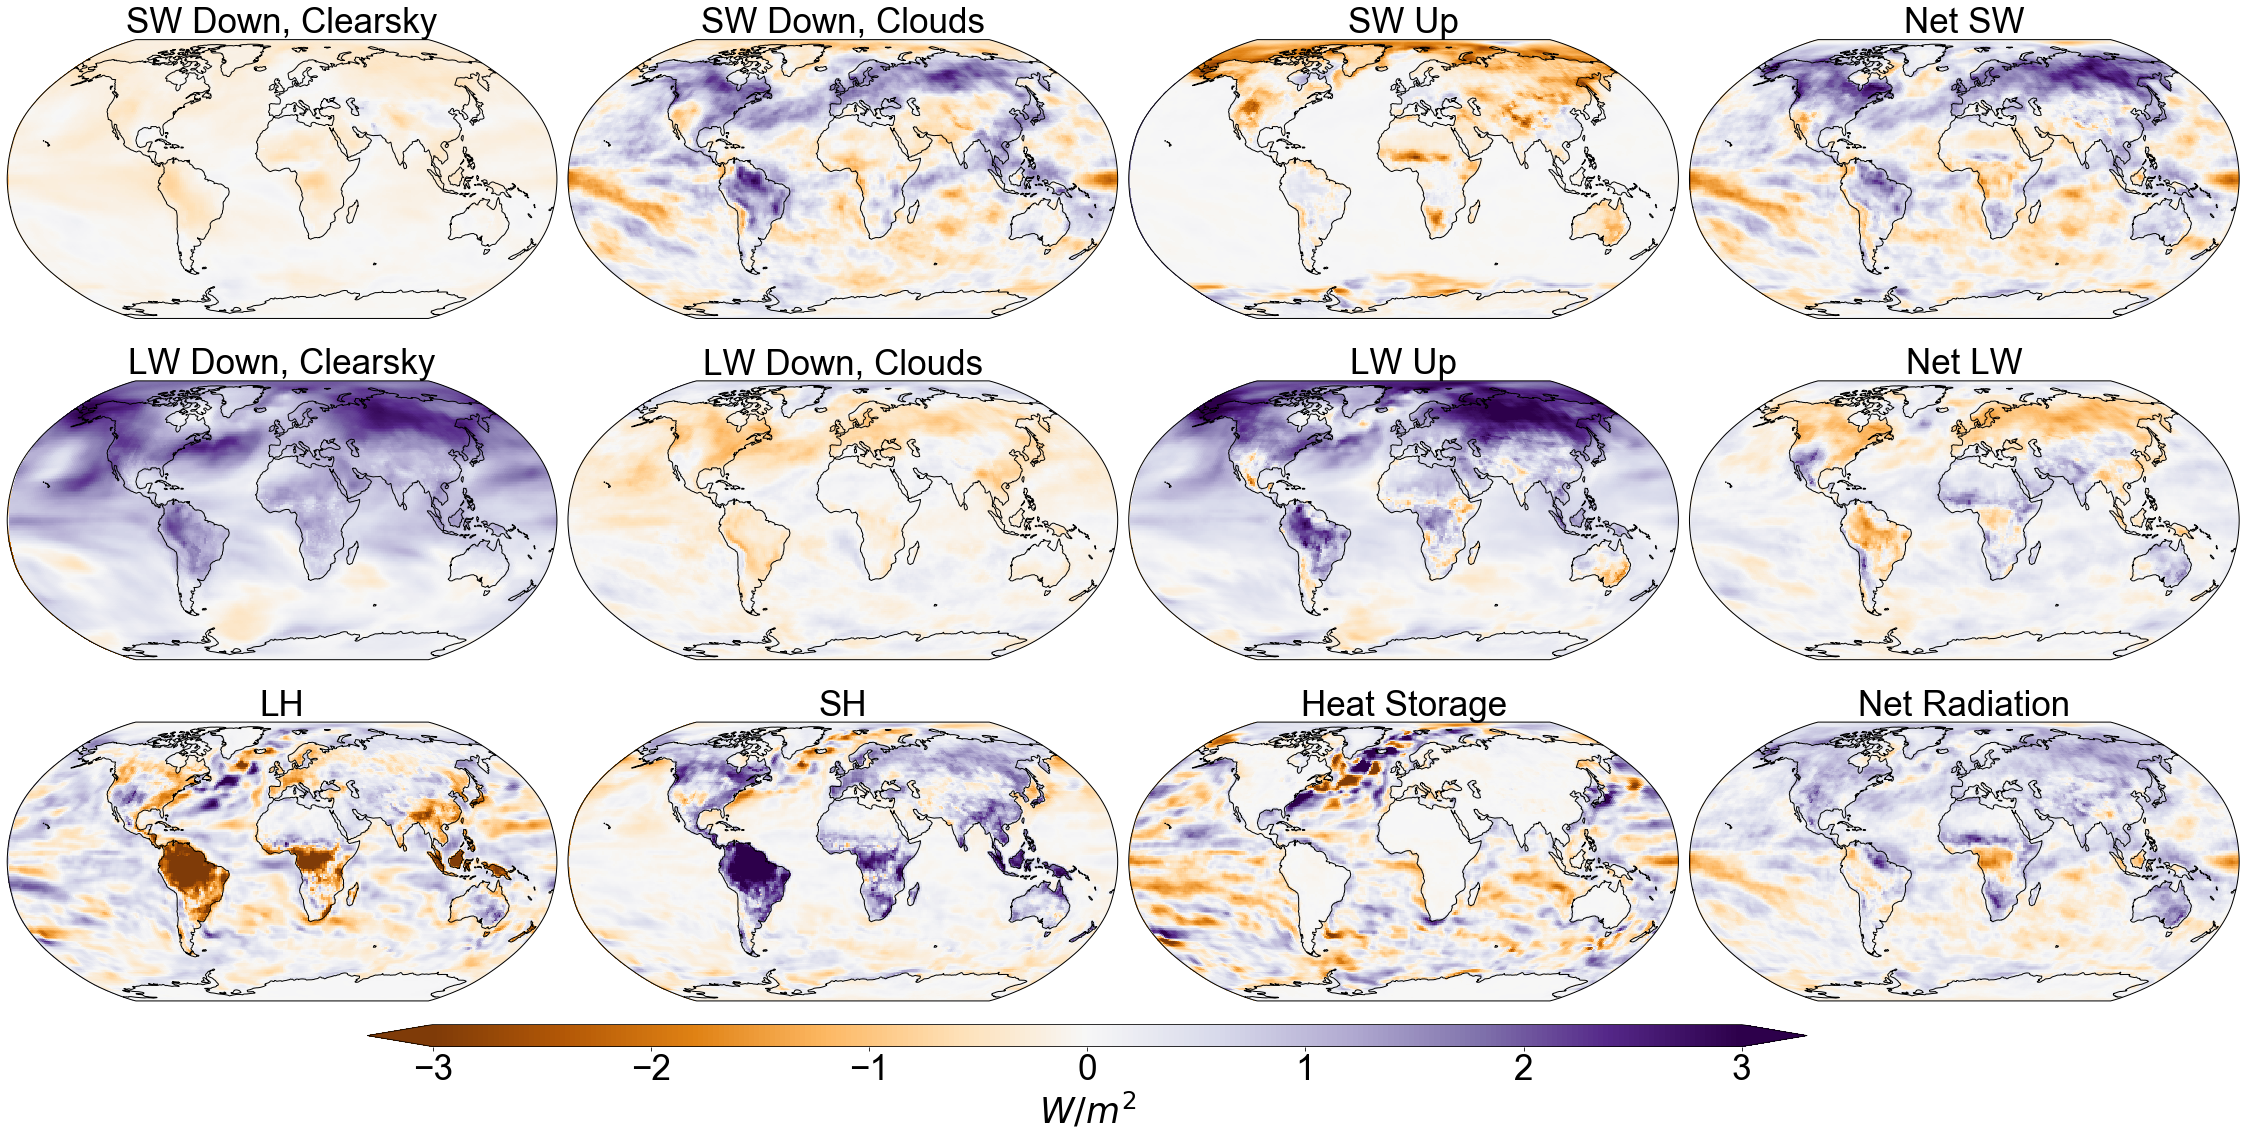

In [11]:
fig = plt.figure(figsize=(40, 17))
fontsize = 35
clim=[-3,3]
cmap=plt.cm.PuOr

for i in range(0, len(varlist)):
    #if i!=10:
    var=varlist[i]
    print('------------------'+var+'------------------')
    PROC_DATA_DICT = make_processed_data_dict.create_variable_dictionary(runnames=['1pctCO2', '1pctCO2-rad'],
                                                                         varname=var,
                                                                         input_path=path_processed_datafiles,
                                                                         cdict_names=['CMIP5','CMIP6'])


    [ds_all_models_phys,
     multimodelSum_phys,
     positiveChangeCount_phys,
     negativeChangeCount_phys,
     num_models_with_data_phys] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                                varname=var,
                                                                end_yr=END_YR,
                                                                change_cutoff=0,
                                                                runname_inds=RUNNAME_INDS,
                                                                cmip_names = CMIP_NAMES)

    mostlyAgree = multi_model_stats.calculate_where_models_mostly_agree(positiveChangeCount_phys,
                                                                    negativeChangeCount_phys,
                                                                    cut_off_num = 9,
                                                                    num_models=num_models_with_data_phys)

    ######################## Make map for subplot ##########################
    ax=plt.subplot(3, 4, i+1, projection=ccrs.Robinson())
    plt.title(varlist_full[i], fontsize=fontsize, y=1)
    mapdata = ds_all_models_phys[var].mean(dim='modelname', skipna=True).values#*(ds_all_models_phys['da_land'].values/100)*(1-ds_all_models_phys['da_glac'].values/100)
    lat = ds_all_models_phys['lat'].values
    lon = ds_all_models_phys['lon'].values
    plot_subplot(mapdata, lat, lon, clim=clim, cmap=cmap, sighatch=False, sigmask=-mostlyAgree)
    
################ Full figure formatting ##########################################

# adjust the subplots to make space for a colorbar and to decrease spacing between subplots
plt.subplots_adjust(bottom=0.08, right=None, top=None, wspace=.02, hspace=.15)

# make an axes for the colorbar
cax = plt.axes([0.25, 0.05, 0.5, 0.018], frameon='no')

# add a colorbar:
cbar = plt.colorbar(cax=cax,orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=fontsize)

# set color limits for the colorbar
cbar.set_clim(clim)

# put a label on the colorbar, e.g. with the units of your field
cbar.set_label('$W/m^2$', fontsize=fontsize)
fig.savefig(path_output +'MultiModelMean_SurfEnergyBudget_CMIP6_nosighatch' +'.png', bbox_inches='tight')